In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

local_path = '/Users/halvardbariller/Desktop/M2_MVA/_SEMESTER_1/PGM/Project/Score-matching-project-'
sys.path.append(local_path)

%load_ext autoreload
%autoreload 2

import dataset
from dataset import sampling, densities, scores, visualisation
import score_matching
from score_matching import toy_models, learning_objectives, score_visualisation

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Data creation

### GMM

In [2]:
# Parameters
N = 10000
mus = [np.array([0, 0]), np.array([10,10])]
sigmas = [np.eye(2), np.eye(2)]
alphas = [0.5, 0.5]

# Dataset
gmm_data, clusters = sampling.gaussian_mixture_sampling(mus, sigmas, alphas, N)

### Banana shaped

In [3]:
# Parameters
N = 10000
mu_banana = np.array([0, 0])
sigma_banana = np.eye(2)

# Dataset
banana_data = sampling.banana_shaped_sampling(N, mu_banana, sigma_banana)

# Score estimation

In [4]:
# Parameters
learning_rate = 1e-3
hidden_size = 128
num_epochs = 1000

In [5]:
# Model Sliced
score_network = toy_models.ToyScoreNetwork(hidden_size=hidden_size).to(device)
optimizer = torch.optim.Adam(score_network.parameters(), lr=learning_rate)
ScoreMatching = learning_objectives.ScoreMatching(optimizer, 'sliced_score_matching', device)

### GMM

In [6]:
ScoreMatching.train(gmm_data, score_network, num_epochs, verbose=False, plot=False)

100%|██████████| 1000/1000 [00:49<00:00, 20.30it/s]

Training finished!


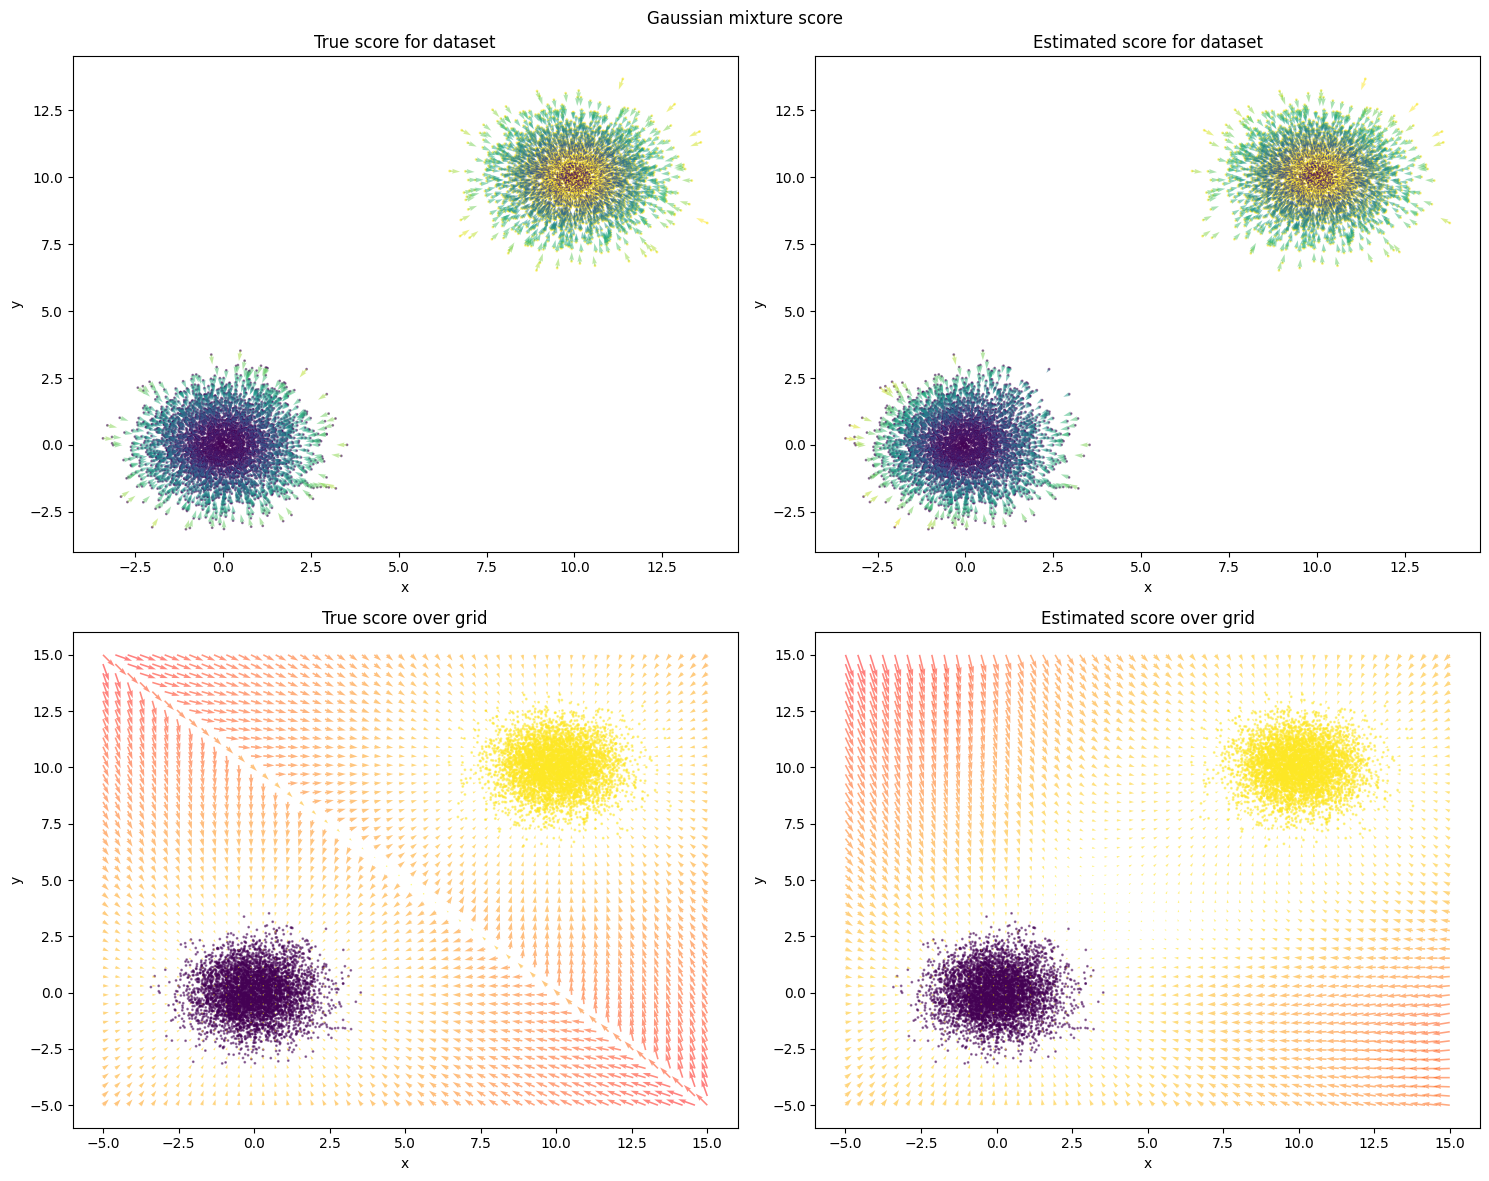

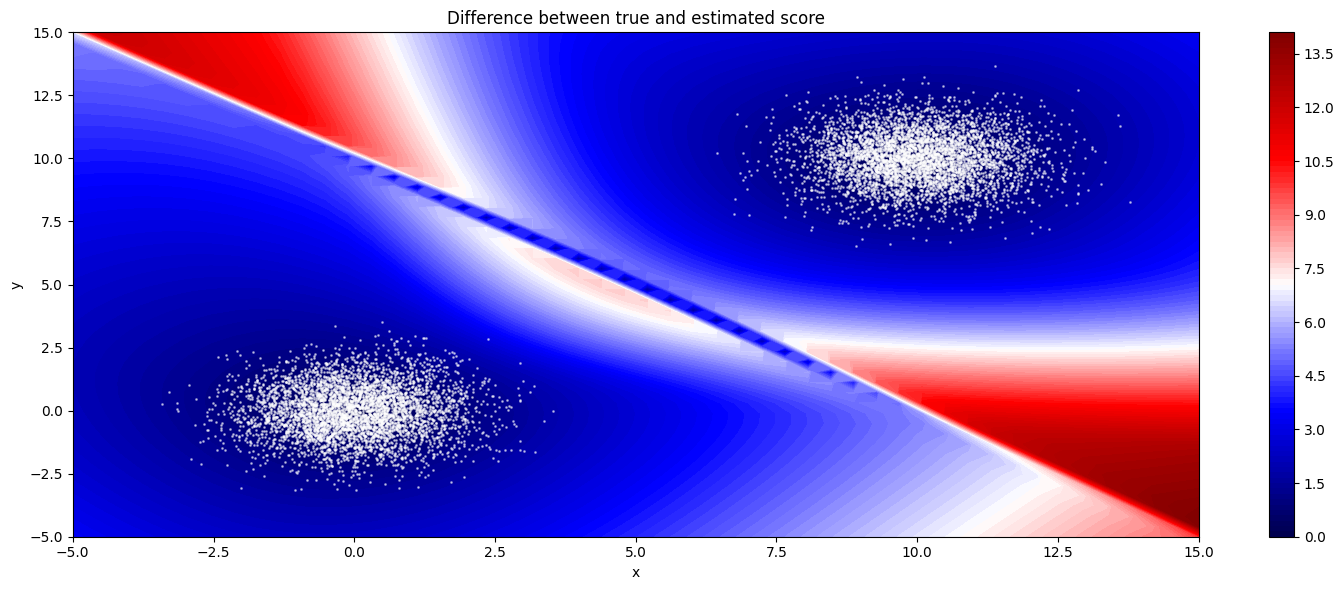

In [7]:
score_visualisation.plot_estimated_score_gmm(gmm_data, clusters, score_network, mus, sigmas, alphas, difference=True)

### Banana-shaped data

In [8]:
ScoreMatching.train(banana_data, score_network, num_epochs, verbose=False, plot=False)

100%|██████████| 1000/1000 [00:52<00:00, 18.94it/s]

Training finished!


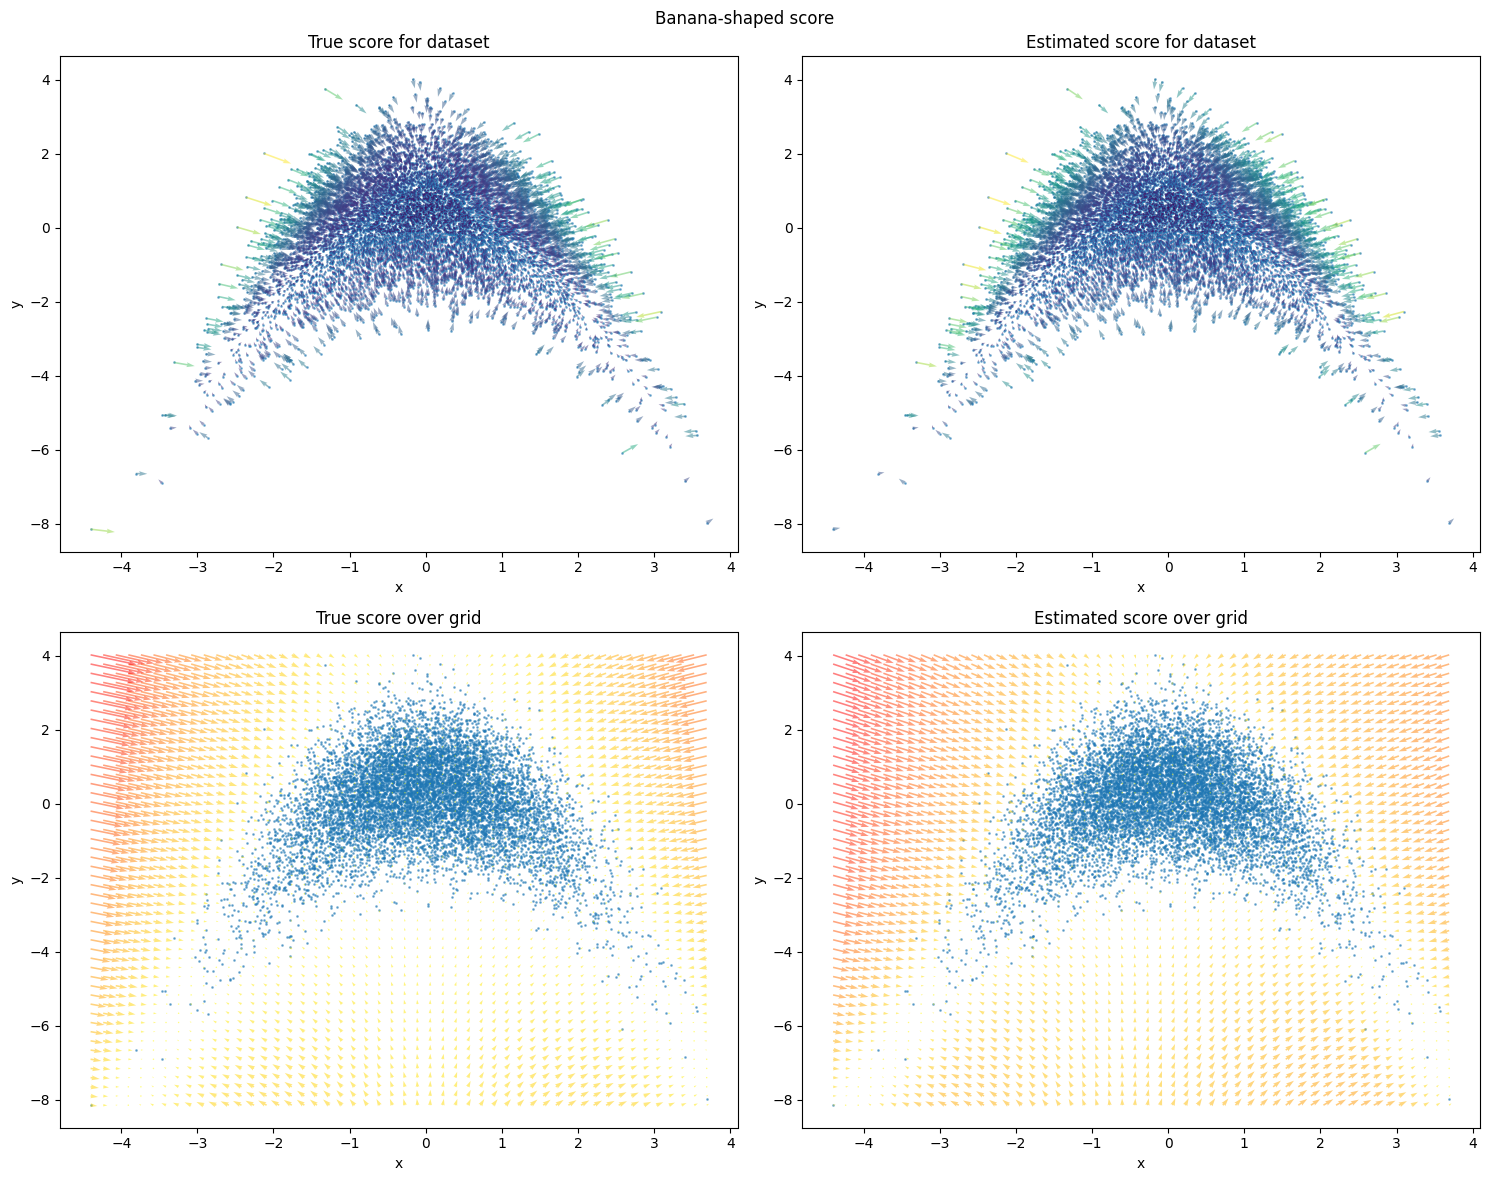

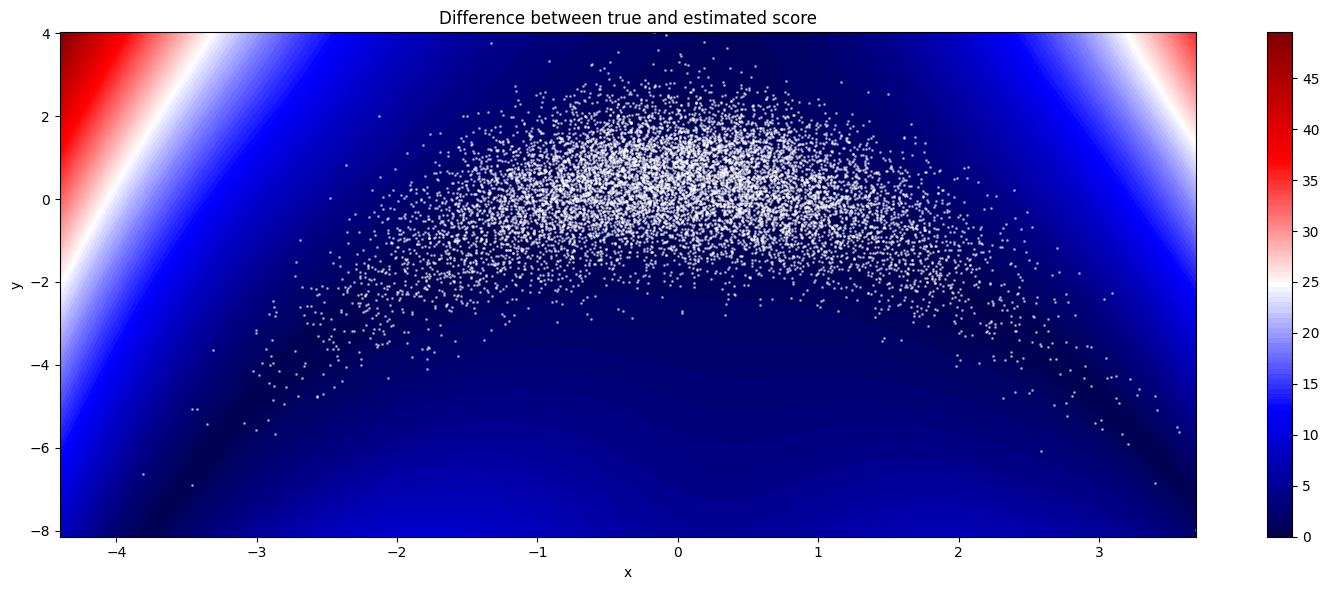

In [9]:
score_visualisation.plot_estimated_score_banana(banana_data, score_network, mu_banana, sigma_banana, difference=True)